<a href="https://colab.research.google.com/github/NafiulVega/Machine-Learning-TI-3E-2024/blob/main/ML_Jobsheet_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biodata
*   Nama : Nafi'ul Alam Dary Vega
*   NIM : 2241720048
*   Kelas : TI-3E
*   Jobsheet 07

# **Praktikum 1**

**KMeans**

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

[Perhitungan Manual KMeans](https://docs.google.com/spreadsheets/d/16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY/edit?usp=sharing)

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 07/Data/'

Mounted at /content/drive


**Penjelasan :**
1. from google.colab import drive: Mengimpor modul drive dari library google.colab. Modul ini menyediakan fungsi untuk berinteraksi dengan Google Drive.
2. drive.mount('/content/drive'): Memanggil fungsi mount() dari modul drive untuk menghubungkan Google Drive ke Google Colab. Direktori Google Drive akan di-mount ke direktori /content/drive di lingkungan Colab.
3. dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 07/Data/': Menetapkan variabel dir dengan path ke direktori di Google Drive tempat file data berada. Path ini akan digunakan untuk mengakses file data di langkah-langkah selanjutnya.

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv(dir + 'Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Penjelasan :**
1. import pandas as pd: Mengimpor library pandas dan memberikan alias pd. Library ini digunakan untuk manipulasi dan analisis data tabular.
2. import numpy as np: Mengimpor library numpy dan memberikan alias np. Library ini digunakan untuk komputasi numerik, terutama untuk operasi array multidimensi.
3. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt. Modul ini digunakan untuk membuat visualisasi data, seperti plot dan grafik.
4. from sklearn.cluster import KMeans: Mengimpor kelas KMeans dari modul cluster dalam library sklearn. Kelas ini digunakan untuk melakukan clustering K-Means pada data.
5. df = pd.read_csv(dir + 'Iris.csv'): Membaca data dari file CSV 'Iris.csv' yang terletak di path yang ditentukan oleh variabel dir, dan menyimpannya dalam DataFrame pandas bernama df.
6. df.head(): Menampilkan lima baris pertama dari DataFrame df untuk melihat pratinjau data.

In [3]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

**Penjelasan :**
1. X = df.iloc[:, 1:-1]: Memilih fitur-fitur dari DataFrame df dan menyimpannya dalam variabel X.
  *   df.iloc digunakan untuk melakukan pemilihan data berdasarkan indeks numerik.
  *   [:, 1:-1] memilih semua baris (:) dan kolom dari indeks 1 hingga indeks kedua dari belakang (1:-1). Ini berarti kolom pertama (indeks 0) dan kolom terakhir diabaikan, sehingga hanya fitur-fitur yang dipilih.
2. y = df.iloc[:, -1]: Memilih kolom terakhir dari DataFrame df dan menyimpannya dalam variabel y.
  *   [:, -1] memilih semua baris (:) dan kolom terakhir (-1). Ini biasanya digunakan untuk memilih kolom target atau label dalam dataset.

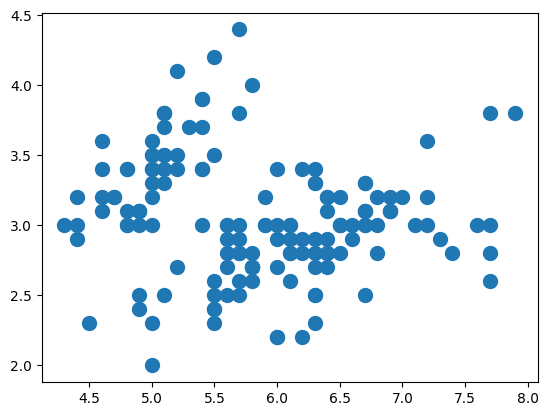

In [4]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Penjelasan :**
1. plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100): Membuat scatter plot dari data yang telah dipilih.
  *   plt.scatter() adalah fungsi dari library matplotlib yang digunakan untuk membuat scatter plot.
  *   X.iloc[:, 0] memilih semua baris (:) dan kolom pertama (indeks 0) dari variabel X, yang berisi data 'Sepal Length'.
  *   X.iloc[:, 1] memilih semua baris (:) dan kolom kedua (indeks 1) dari variabel X, yang berisi data 'Sepal Width'.
  *   s = 100 menentukan ukuran marker (titik) pada scatter plot menjadi 100.

In [5]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

**Penjelasan :**
1. from sklearn.cluster import KMeans: Mengimpor kelas KMeans dari modul cluster dalam library sklearn. Kelas ini digunakan untuk melakukan clustering K-Means pada data.
2. cl_kmeans = KMeans(n_clusters=2): Membuat objek KMeans dengan parameter n_clusters=2. Parameter ini menentukan jumlah cluster yang diinginkan, dalam hal ini adalah 2.
3. y_kmeans = cl_kmeans.fit_predict(X): Melatih model K-Means pada data X dan memprediksi cluster untuk setiap data point.
  *   fit_predict() adalah metode yang menggabungkan proses training dan prediksi dalam satu langkah.
  *   Hasil prediksi, yaitu cluster untuk setiap data point, disimpan dalam variabel y_kmeans.

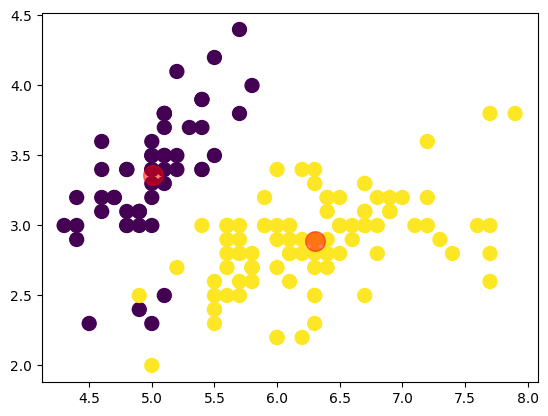

In [6]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Penjelasan :**
1. plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans): Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   plt.scatter() adalah fungsi dari library matplotlib yang digunakan untuk membuat scatter plot.
  *   X.iloc[:, 0] dan X.iloc[:, 1] memilih kolom 'Sepal Length' dan 'Sepal Width' dari data X untuk diplot pada sumbu x dan y.
  *   s = 100 menentukan ukuran marker (titik) pada scatter plot menjadi 100.
  *   c=y_kmeans mewarnai titik-titik data berdasarkan cluster yang diprediksi oleh model K-Means, yang disimpan dalam variabel y_kmeans.
2. centers = cl_kmeans.cluster_centers_: Mengambil koordinat centroid dari setiap cluster yang telah dihitung oleh model K-Means dan menyimpannya dalam variabel centers.
3. plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5): Membuat scatter plot untuk memvisualisasikan centroid dari setiap cluster.
  *   centers[:, 0] dan centers[:, 1] memilih koordinat x dan y dari centroid untuk diplot.
  *   c='red' mewarnai centroid dengan warna merah.
  *   s=200 menentukan ukuran marker (titik) untuk centroid menjadi 200.
  *   alpha=0.5 mengatur transparansi centroid menjadi 0.5.

In [7]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


**Penjelasan :**
1. print(f'Nilai SSE: {cl_kmeans.inertia_}'): Mencetak nilai Sum of Squared Errors (SSE) dari model K-Means.
  *   print() adalah fungsi untuk menampilkan output ke konsol.
  *   f'Nilai SSE: {cl_kmeans.inertia_}' adalah f-string yang digunakan untuk memformat output.
  *   cl_kmeans.inertia_ adalah atribut dari objek cl_kmeans yang menyimpan nilai SSE. SSE adalah ukuran seberapa baik model K-Means telah mengelompokkan data. Nilai SSE yang lebih rendah menunjukkan clustering yang lebih baik.

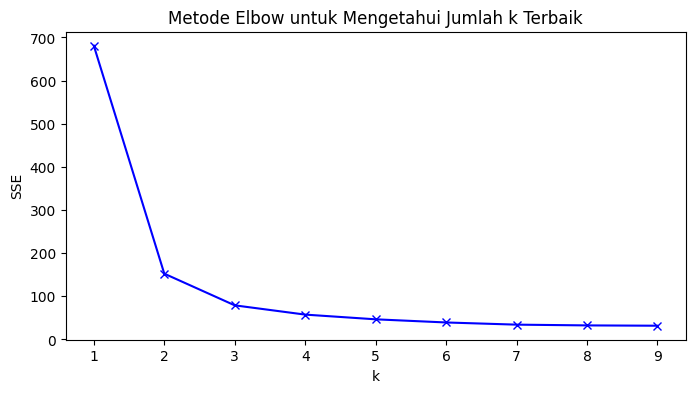

In [8]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

**Penjelasan :**
1. sse = []: Membuat list kosong bernama sse untuk menyimpan nilai Sum of Squared Errors (SSE) untuk setiap nilai k.
2. K = range(1, 10): Membuat range nilai k dari 1 hingga 9, yang akan digunakan untuk mencoba jumlah cluster yang berbeda.
3. for k in K:: Looping untuk setiap nilai k dalam range K.
4. kmeanModel = KMeans(n_clusters=k): Membuat objek KMeans dengan jumlah cluster k.
5. kmeanModel.fit(X): Melatih model KMeans dengan data X.
6. sse.append(kmeanModel.inertia_): Menambahkan nilai SSE dari model yang telah dilatih ke dalam list sse.
7. plt.figure(figsize=(8, 4)): Membuat figure baru dengan ukuran 8x4 inci.
8. plt.plot(K, sse, "bx-"): Membuat plot garis dari nilai k (sumbu x) dan nilai SSE (sumbu y). bx- menentukan format marker dan garis pada plot.
9. plt.xlabel("k"): Memberikan label "k" pada sumbu x.
10. plt.ylabel("SSE"): Memberikan label "SSE" pada sumbu y.
11. plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik"): Memberikan judul pada plot.
12. plt.show(): Menampilkan plot.

In [9]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=46.55057267267267
k=6; SSE=39.251830892636775
k=7; SSE=34.19846461871464
k=8; SSE=32.443927777777766
k=9; SSE=31.70778232323233


**Penjelasan :**
1. for idx, sse_val in enumerate(sse, start=1):: Looping melalui setiap elemen dalam list sse menggunakan enumerate.
  *   enumerate menghasilkan pasangan indeks dan nilai dari list sse.
  *   idx akan berisi indeks (dimulai dari 1 karena start=1), dan sse_val akan berisi nilai SSE yang sesuai.
2. print(f'k={idx}; SSE={sse_val}'): Mencetak nilai k dan SSE untuk setiap iterasi loop.
  *   f-string digunakan untuk memformat output agar mudah dibaca.

# **Praktikum 2**
Konsep K-Means untuk klasterisasi data

**Import library**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

**Penjelasan :**
1. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt. Modul ini digunakan untuk membuat visualisasi data, seperti plot dan grafik.
2. import seaborn as sns; sns.set(): Mengimpor library seaborn dan memberikan alias sns. Library ini dibangun di atas matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat visualisasi data yang menarik dan informatif. sns.set() digunakan untuk menerapkan gaya default seaborn ke plot.
3. import numpy as np: Mengimpor library numpy dan memberikan alias np. Library ini digunakan untuk komputasi numerik, terutama untuk operasi array multidimensi.

**Pengantar k-Means**

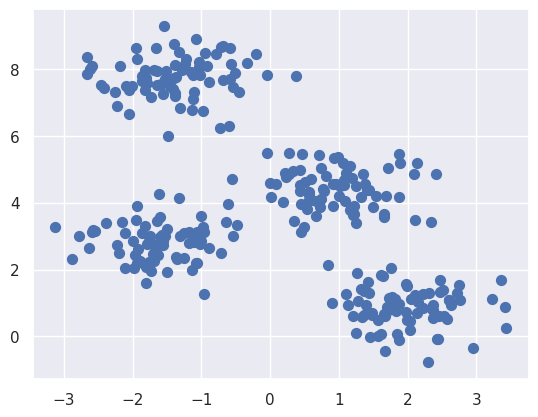

In [11]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

**Penjelasan :**
1. from sklearn.datasets import make_blobs: Mengimpor fungsi make_blobs dari modul datasets dalam library sklearn. Fungsi ini digunakan untuk menghasilkan dataset sintetis berupa gumpalan data (blobs) untuk keperluan clustering.
2. X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0): Memanggil fungsi make_blobs untuk membuat dataset sintetis.
  *   n_samples=300: Menentukan jumlah sampel data yang akan dihasilkan, yaitu 300.
  *   centers=4: Menentukan jumlah cluster atau pusat gumpalan data, yaitu 4.
  *   cluster_std=0.60: Menentukan standar deviasi dari cluster, yang mengontrol seberapa tersebar data dalam setiap cluster.
  *   random_state=0: Menentukan seed untuk generator angka acak, sehingga hasil yang dihasilkan akan konsisten setiap kali kode dijalankan.
  *   Fungsi make_blobs mengembalikan dua nilai: X yang berisi data point dan y_true yang berisi label cluster sebenarnya untuk setiap data point.
3. plt.scatter(X[:, 0], X[:, 1], s=50);: Membuat scatter plot dari data yang dihasilkan.
  *   plt.scatter() adalah fungsi dari library matplotlib yang digunakan untuk membuat scatter plot.
  *   X[:, 0] dan X[:, 1] memilih kolom pertama dan kedua dari data X untuk diplot pada sumbu x dan y.
  *   s=50 menentukan ukuran marker (titik) pada scatter plot menjadi 50.

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Penjelasan :**
1. from sklearn.cluster import KMeans: Mengimpor kelas KMeans dari modul cluster dalam library sklearn. Kelas ini digunakan untuk melakukan clustering K-Means pada data.
2. kmeans = KMeans(n_clusters=4): Membuat objek KMeans dengan parameter n_clusters=4. Parameter ini menentukan jumlah cluster yang diinginkan, dalam hal ini adalah 4.
3. kmeans.fit(X): Melatih model K-Means pada data X. Metode fit() digunakan untuk menyesuaikan model dengan data dan menemukan pusat cluster.
4. y_kmeans = kmeans.predict(X): Memprediksi cluster untuk setiap data point dalam X menggunakan model K-Means yang telah dilatih. Hasil prediksi, yaitu cluster untuk setiap data point, disimpan dalam variabel y_kmeans.

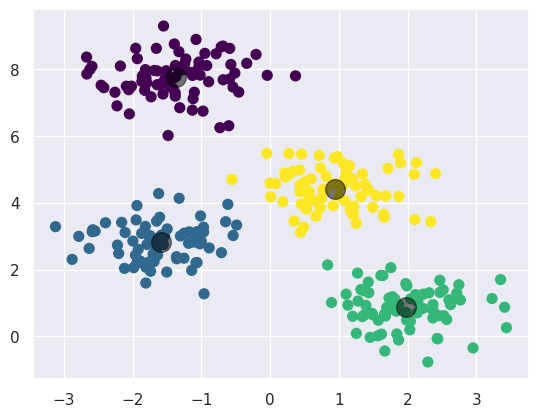

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Penjelasan :**
1. plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis'): Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   plt.scatter() adalah fungsi dari library matplotlib yang digunakan untuk membuat scatter plot.
  *   X[:, 0] dan X[:, 1] memilih kolom pertama dan kedua dari data X untuk diplot pada sumbu x dan y.
  *   c=y_kmeans mewarnai titik-titik data berdasarkan cluster yang diprediksi oleh model K-Means, yang disimpan dalam variabel y_kmeans.
  *   s=50 menentukan ukuran marker (titik) pada scatter plot menjadi 50.
  *   cmap='viridis' menentukan colormap yang digunakan untuk mewarnai titik-titik data. 'viridis' adalah salah satu colormap default di matplotlib.
2. centers = kmeans.cluster_centers_: Mengambil koordinat centroid dari setiap cluster yang telah dihitung oleh model K-Means dan menyimpannya dalam variabel centers.
3. plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5): Membuat scatter plot untuk memvisualisasikan centroid dari setiap cluster.
  *   centers[:, 0] dan centers[:, 1] memilih koordinat x dan y dari centroid untuk diplot.
  *   c='black' mewarnai centroid dengan warna hitam.
  *   s=200 menentukan ukuran marker (titik) untuk centroid menjadi 200.
  *   alpha=0.5 mengatur transparansi centroid menjadi 0.5.

**Algoritma Expectation-Maximization**

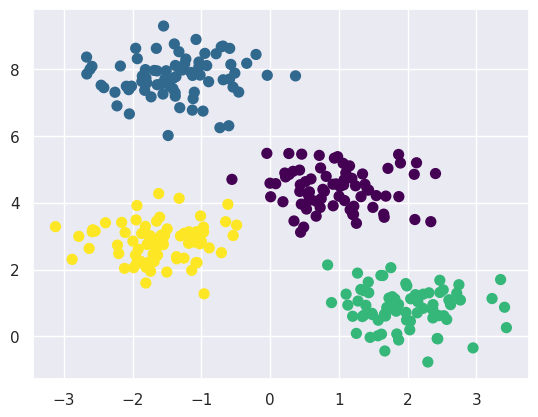

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan :**
1. from sklearn.metrics import pairwise_distances_argmin: Mengimpor fungsi pairwise_distances_argmin dari modul metrics dalam library sklearn. Fungsi ini digunakan untuk menghitung jarak antara setiap pasangan data point dan mengembalikan indeks dari data point terdekat.
2. def find_clusters(X, n_clusters, rseed=2):: Mendefinisikan fungsi find_clusters yang menerima data X, jumlah cluster n_clusters, dan seed untuk generator angka acak rseed sebagai input. Fungsi ini mengimplementasikan algoritma K-Means untuk mengelompokkan data.
3. rng = np.random.RandomState(rseed): Membuat objek RandomState dari library numpy dengan seed rseed. Objek ini digunakan untuk menghasilkan angka acak.
4. i = rng.permutation(X.shape[0])[:n_clusters]: Mengacak indeks dari data point dalam X dan memilih n_clusters indeks pertama sebagai pusat cluster awal.
5. centers = X[i]: Menetapkan pusat cluster awal menggunakan data point yang dipilih secara acak.
6. while True:: Looping tanpa batas hingga kondisi berhenti terpenuhi.
7. labels = pairwise_distances_argmin(X, centers): Menetapkan label cluster untuk setiap data point berdasarkan pusat cluster terdekat menggunakan fungsi pairwise_distances_argmin.
8. new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]): Menghitung pusat cluster baru dengan mengambil rata-rata dari semua data point dalam setiap cluster.
9. if np.all(centers == new_centers): break: Memeriksa apakah pusat cluster baru sama dengan pusat cluster sebelumnya. Jika ya, loop dihentikan.
10. centers = new_centers: Memperbarui pusat cluster dengan pusat cluster baru.
11. return centers, labels: Mengembalikan pusat cluster dan label cluster.
12. centers, labels = find_clusters(X, 4): Memanggil fungsi find_clusters dengan data X dan jumlah cluster 4 untuk mengelompokkan data. Hasilnya disimpan dalam variabel centers dan labels.
13. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat scatter plot untuk memvisualisasikan hasil clustering. Data point diwarnai berdasarkan label cluster, dan colormap 'viridis' digunakan untuk memberikan variasi warna.

**Perubahan random**

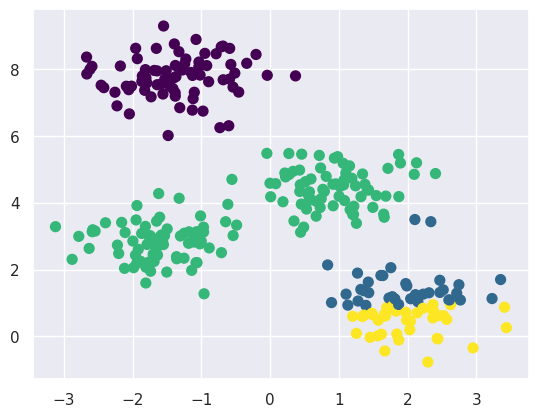

In [15]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan :**
1. centers, labels = find_clusters(X, 4, rseed=0): Memanggil fungsi find_clusters dengan data X, jumlah cluster 4, dan rseed=0.
  *   rseed=0 menentukan seed untuk generator angka acak, yang akan memengaruhi pemilihan pusat cluster awal.
  *   Fungsi find_clusters akan mengembalikan pusat cluster dan label cluster, yang disimpan dalam variabel centers dan labels.
2. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');: Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   plt.scatter() adalah fungsi dari library matplotlib yang digunakan untuk membuat scatter plot.
  *   X[:, 0] dan X[:, 1] memilih kolom pertama dan kedua dari data X untuk diplot pada sumbu x dan y.
  *   c=labels mewarnai titik-titik data berdasarkan label cluster yang dihasilkan oleh find_clusters.
  *   s=50 menentukan ukuran marker (titik) pada scatter plot menjadi 50.
  *   cmap='viridis' menentukan colormap yang digunakan untuk mewarnai titik-titik data. 'viridis' adalah salah satu colormap default di matplotlib.

**Optimalisasi Jumlah Klaster**

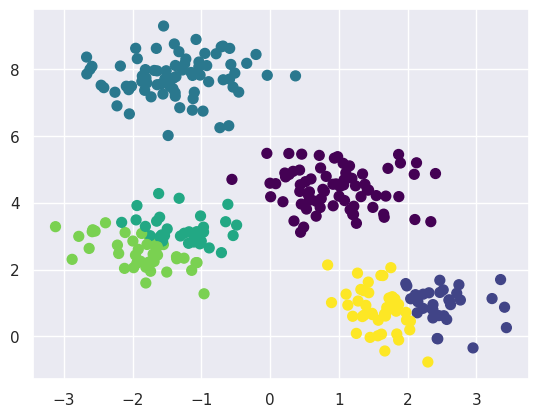

In [16]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Penjelasan :**
1. labels = KMeans(6, random_state=0).fit_predict(X):
  *   Membuat objek KMeans dengan n_clusters=6 dan random_state=0. Ini berarti kita ingin mengelompokkan data menjadi 6 cluster dan menggunakan seed 0 untuk inisialisasi.
  *   fit_predict(X): Melatih model KMeans pada data X dan langsung memprediksi label cluster untuk setiap data point dalam X. Hasil prediksi (label cluster) disimpan dalam variabel labels.
2. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');:
  *   Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   X[:, 0] dan X[:, 1] digunakan untuk mengambil koordinat x dan y dari data point dalam X untuk diplot.
  *   c=labels: Mewarnai setiap data point berdasarkan label cluster yang diprediksi dan disimpan dalam variabel labels.
  *   s=50: Menentukan ukuran marker (titik) pada scatter plot menjadi 50.
  *   cmap='viridis': Menggunakan colormap 'viridis' untuk mewarnai titik-titik data, memberikan variasi warna yang mudah dibedakan.

**Batas Klaster yang Tidak Selalu Linier**

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

**Penjelasan :**
1. from sklearn.datasets import make_moons: Mengimpor fungsi make_moons dari modul datasets dalam library sklearn. Fungsi ini digunakan untuk menghasilkan dataset sintetis berbentuk bulan sabit, yang sering digunakan untuk menguji algoritma clustering.
2. X, y = make_moons(200, noise=.05, random_state=0): Memanggil fungsi make_moons untuk membuat dataset sintetis.
  *   200: Menentukan jumlah sampel data yang akan dihasilkan, yaitu 200.
  *   noise=.05: Menentukan tingkat noise yang akan ditambahkan ke data, yang mengontrol seberapa banyak data point menyimpang dari bentuk bulan sabit ideal.
  *   random_state=0: Menentukan seed untuk generator angka acak, sehingga hasil yang dihasilkan akan konsisten setiap kali kode dijalankan.
  *   Fungsi make_moons mengembalikan dua nilai: X yang berisi data point dan y yang berisi label cluster sebenarnya untuk setiap data point.

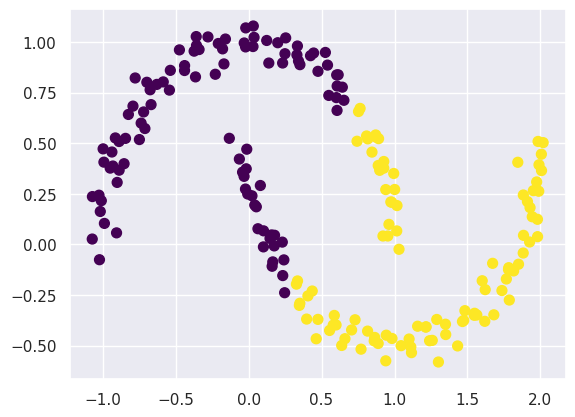

In [18]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan :**
1. labels = KMeans(2, random_state=0).fit_predict(X):
  *   Membuat objek KMeans dengan n_clusters=2 dan random_state=0. Ini mengindikasikan bahwa kita ingin mengelompokkan data menjadi 2 cluster dan menggunakan seed 0 untuk inisialisasi.
  *   fit_predict(X): Melatih model KMeans pada data X dan langsung memprediksi label cluster untuk setiap data point dalam X. Hasil prediksi (label cluster) disimpan dalam variabel labels.
2. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');:
  *   Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   X[:, 0] dan X[:, 1] digunakan untuk mengambil koordinat x dan y dari data point dalam X untuk diplot.
  *   c=labels: Mewarnai setiap data point berdasarkan label cluster yang diprediksi dan disimpan dalam variabel labels.
  *   s=50: Menentukan ukuran marker (titik) pada scatter plot menjadi 50.
  *   cmap='viridis': Menggunakan colormap 'viridis' untuk mewarnai titik-titik data, memberikan variasi warna yang mudah dibedakan.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


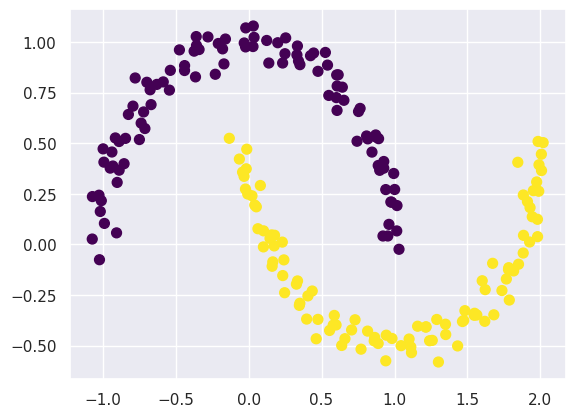

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Penjelasan :**
1. from sklearn.cluster import SpectralClustering: Mengimpor kelas SpectralClustering dari modul cluster dalam library sklearn. Kelas ini digunakan untuk melakukan clustering menggunakan algoritma Spectral Clustering.
2. model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'):
  *   Membuat objek SpectralClustering dengan parameter:
    *   n_clusters=2: Menentukan jumlah cluster yang diinginkan, yaitu 2.
    *   affinity='nearest_neighbors': Menentukan metode untuk membangun matriks affinity. 'nearest_neighbors' menggunakan k-nearest neighbors untuk menentukan kemiripan antar data point.
    *   assign_labels='kmeans': Menentukan metode untuk menetapkan label cluster setelah embedding spectral. 'kmeans' menggunakan algoritma KMeans untuk mengelompokkan data dalam ruang embedding.
3. labels = model.fit_predict(X):
  *   Melatih model Spectral Clustering pada data X dan langsung memprediksi label cluster untuk setiap data point dalam X.
  *   Hasil prediksi (label cluster) disimpan dalam variabel labels.
4. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');:
  *   Membuat scatter plot untuk memvisualisasikan hasil clustering.
  *   X[:, 0] dan X[:, 1] digunakan untuk mengambil koordinat x dan y dari data point dalam X untuk diplot.
  *   c=labels: Mewarnai setiap data point berdasarkan label cluster yang diprediksi dan disimpan dalam variabel labels.
  *   s=50: Menentukan ukuran marker (titik) pada scatter plot menjadi 50.
  *   cmap='viridis': Menggunakan colormap 'viridis' untuk mewarnai titik-titik data, memberikan variasi warna yang mudah dibedakan.

**Contoh Kasus 1: Karakter Angka**

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

**Penjelasan :**
1. from sklearn.datasets import load_digits: Mengimpor fungsi load_digits dari modul datasets dalam library sklearn. Fungsi ini digunakan untuk memuat dataset digit handwritten dari UCI machine learning repository.
2. digits = load_digits(): Memanggil fungsi load_digits untuk memuat dataset digit handwritten dan menyimpannya dalam variabel digits. Dataset ini berisi gambar digit handwritten dalam bentuk array NumPy.
3. digits.data.shape: Mengakses atribut data dari objek digits dan menampilkan bentuknya (shape). Atribut data berisi data gambar digit handwritten, dan shape menunjukkan dimensi dari array NumPy yang menyimpan data tersebut.

In [21]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

**Penjelasan :**
1. kmeans = KMeans(n_clusters=10, random_state=0): Membuat objek KMeans dengan parameter:
  *   n_clusters=10: Menentukan jumlah cluster yang diinginkan, yaitu 10 (sesuai dengan jumlah digit 0-9).
  *   random_state=0: Menentukan seed untuk generator angka acak, sehingga hasil yang dihasilkan akan konsisten setiap kali kode dijalankan.
2. clusters = kmeans.fit_predict(digits.data):
  *   Melatih model KMeans pada data digits.data (data gambar digit handwritten) dan langsung memprediksi label cluster untuk setiap data point.
  *   Hasil prediksi (label cluster) disimpan dalam variabel clusters.
3. kmeans.cluster_centers_.shape: Mengakses atribut cluster_centers_ dari objek kmeans dan menampilkan bentuknya (shape).
  *   cluster_centers_ berisi koordinat pusat dari setiap cluster yang ditemukan oleh KMeans.
  *   shape menunjukkan dimensi dari array NumPy yang menyimpan koordinat pusat cluster.

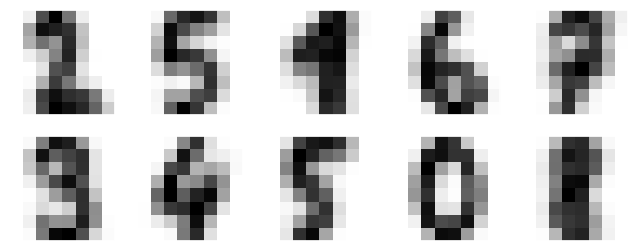

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**Penjelasan :**
1. fig, ax = plt.subplots(2, 5, figsize=(8, 3)):
  *   Membuat figure dan axes untuk plot.
  *   plt.subplots(2, 5) membuat grid 2x5 dari subplot, menghasilkan 10 axes yang disimpan dalam array ax.
  *   figsize=(8, 3) menentukan ukuran figure menjadi 8x3 inci.
2. centers = kmeans.cluster_centers_.reshape(10, 8, 8):
  *   Mengambil pusat cluster dari model KMeans (kmeans.cluster_centers_) dan mengubah bentuknya (reshape) menjadi 10x8x8.
  *   Ini karena setiap pusat cluster mewakili sebuah gambar digit handwritten dengan ukuran 8x8 piksel, dan ada 10 cluster (untuk digit 0-9).
3. for axi, center in zip(ax.flat, centers)::
  *   Looping melalui setiap axes (axi) dalam array ax dan setiap pusat cluster (center) dalam array centers.
  *   ax.flat digunakan untuk mengiterasi melalui semua axes dalam array ax secara berurutan.
  *   zip digunakan untuk menggabungkan elemen-elemen dari ax.flat dan centers menjadi pasangan.
4. axi.set(xticks=[], yticks=[]):
  *   Menonaktifkan ticks (tanda) pada sumbu x dan y untuk axes saat ini (axi). Ini dilakukan agar plot hanya menampilkan gambar digit handwritten tanpa ticks.
5. axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary):
  *   Menampilkan gambar pusat cluster (center) pada axes saat ini (axi).
  *   interpolation='nearest' menentukan metode interpolasi untuk menampilkan gambar. 'nearest' menggunakan nilai piksel terdekat untuk mengisi area di antara piksel.
  *   cmap=plt.cm.binary menentukan colormap yang digunakan untuk menampilkan gambar. 'binary' menggunakan warna hitam dan putih.

In [23]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

**Penjelasan :**
1. from scipy.stats import mode: Mengimpor fungsi mode dari modul stats dalam library scipy. Fungsi ini digunakan untuk mencari nilai modus (nilai yang paling sering muncul) dalam suatu dataset.
2. labels = np.zeros_like(clusters): Membuat array labels dengan ukuran dan tipe data yang sama dengan array clusters, dan menginisialisasinya dengan nilai nol. Array ini akan digunakan untuk menyimpan label prediksi yang disesuaikan.
3. for i in range(10):: Looping melalui setiap digit dari 0 hingga 9.
4. mask = (clusters == i): Membuat array boolean mask di mana elemen-elemennya bernilai True jika elemen yang sesuai dalam array clusters sama dengan i (label cluster), dan False jika tidak.
5. labels[mask] = mode(digits.target[mask])[0]:
  *   Mengambil nilai modus dari label sebenarnya (digits.target) untuk data point yang termasuk dalam cluster i (ditentukan oleh mask).
  *   Menetapkan nilai modus tersebut sebagai label prediksi yang disesuaikan untuk data point tersebut dalam array labels.

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

**Penjelasan :**
1. from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul metrics dalam library sklearn. Fungsi ini digunakan untuk menghitung akurasi dari model klasifikasi.
2. accuracy_score(digits.target, labels): Memanggil fungsi accuracy_score dengan dua argumen:
  *   digits.target: Label sebenarnya dari dataset digit handwritten.
  *   labels: Label prediksi yang telah disesuaikan. Fungsi accuracy_score akan menghitung akurasi model dengan membandingkan label sebenarnya dan label prediksi, dan mengembalikan nilai akurasi dalam rentang 0 hingga 1.

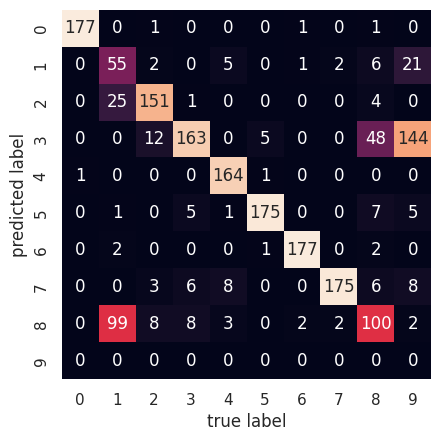

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Penjelasan :**
1. from sklearn.metrics import confusion_matrix: Mengimpor fungsi confusion_matrix dari modul metrics dalam library sklearn. Fungsi ini digunakan untuk membuat confusion matrix dari model klasifikasi.
2. mat = confusion_matrix(digits.target, labels): Memanggil fungsi confusion_matrix dengan dua argumen:
  *   digits.target: Label sebenarnya dari dataset digit handwritten.
  *   labels: Label prediksi yang telah disesuaikan. Fungsi confusion_matrix akan membuat confusion matrix dan menyimpannya dalam variabel mat. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
3. sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names): Memanggil fungsi heatmap dari library seaborn untuk memvisualisasikan confusion matrix.
  *   mat.T: Menggunakan transpose dari confusion matrix (mat) agar label sebenarnya ditampilkan pada sumbu horizontal (x) dan label prediksi pada sumbu vertikal (y).
  *   square=True: Membuat sel-sel dalam heatmap berbentuk persegi.
  *   annot=True: Menampilkan nilai-nilai dalam setiap sel heatmap.
  *   fmt='d': Memformat nilai-nilai dalam sel heatmap sebagai bilangan bulat.
  *   cbar=False: Menonaktifkan colorbar.
  *   xticklabels=digits.target_names: Menggunakan nama-nama kelas (digit 0-9) sebagai label pada sumbu horizontal (x).
  *   yticklabels=digits.target_names: Menggunakan nama-nama kelas (digit 0-9) sebagai label pada sumbu vertikal (y).
4. plt.xlabel('true label'): Memberikan label "true label" pada sumbu horizontal (x).
5. plt.ylabel('predicted label'): Memberikan label "predicted label" pada sumbu vertikal (y).

In [26]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

**Penjelasan :**
1. from sklearn.manifold import TSNE: Mengimpor kelas TSNE dari modul manifold dalam library sklearn. Kelas ini digunakan untuk melakukan dimensionality reduction menggunakan teknik t-distributed Stochastic Neighbor Embedding (t-SNE).
2. tsne = TSNE(n_components=2, init='random', random_state=0): Membuat objek TSNE dengan parameter:
  *   n_components=2: Menentukan jumlah dimensi target setelah reduksi, yaitu 2.
  *   init='random': Menentukan metode inisialisasi embedding. 'random' menginisialisasi embedding secara acak.
  *   random_state=0: Menentukan seed untuk generator angka acak, sehingga hasil yang dihasilkan akan konsisten setiap kali kode dijalankan.
3. digits_proj = tsne.fit_transform(digits.data):
  *   Melakukan dimensionality reduction pada data digits.data (data gambar digit handwritten) menggunakan objek tsne.
  *   Metode fit_transform() menggabungkan proses fitting dan transformasi dalam satu langkah.
  *   Hasil reduksi dimensi, yaitu data dalam ruang 2 dimensi, disimpan dalam variabel digits_proj.
4. kmeans = KMeans(n_clusters=10, random_state=0): Membuat objek KMeans dengan parameter n_clusters=10 dan random_state=0. Ini mengindikasikan bahwa kita ingin mengelompokkan data menjadi 10 cluster dan menggunakan seed 0 untuk inisialisasi.
5. clusters = kmeans.fit_predict(digits_proj):
  *   Melatih model KMeans pada data digits_proj (data yang telah direduksi dimensinya) dan langsung memprediksi label cluster untuk setiap data point.
  *   Hasil prediksi (label cluster) disimpan dalam variabel clusters.
6. labels = np.zeros_like(clusters): Membuat array labels dengan ukuran dan tipe data yang sama dengan array clusters, dan menginisialisasinya dengan nilai nol. Array ini akan digunakan untuk menyimpan label prediksi yang disesuaikan.
7. for i in range(10):: Looping melalui setiap digit dari 0 hingga 9.
8. mask = (clusters == i): Membuat array boolean mask di mana elemen-elemennya bernilai True jika elemen yang sesuai dalam array clusters sama dengan i (label cluster), dan False jika tidak.
9. labels[mask] = mode(digits.target[mask])[0]:
  *   Mengambil nilai modus dari label sebenarnya (digits.target) untuk data point yang termasuk dalam cluster i (ditentukan oleh mask).
  *   Menetapkan nilai modus tersebut sebagai label prediksi yang disesuaikan untuk data point tersebut dalam array labels.
10. accuracy_score(digits.target, labels): Memanggil fungsi accuracy_score dengan dua argumen:
  *   digits.target: Label sebenarnya dari dataset digit handwritten.
  *   labels: Label prediksi yang telah disesuaikan. Fungsi accuracy_score akan menghitung akurasi model dengan membandingkan label sebenarnya dan label prediksi, dan mengembalikan nilai akurasi dalam rentang 0 hingga 1.

**Studi Kasus 2: Kompresi Citra**

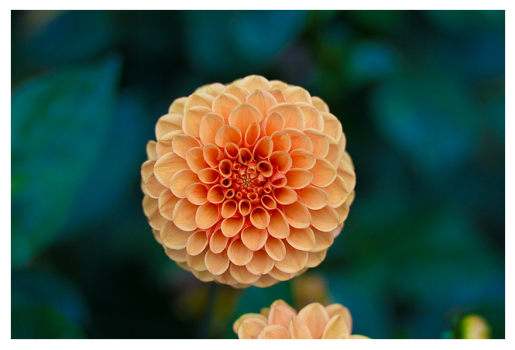

In [27]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

**Penjelasan :**
1.

In [28]:
flower.shape

(427, 640, 3)

**Penjelasan :**
1.

In [29]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

**Penjelasan :**
1.

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

**Penjelasan :**
1.

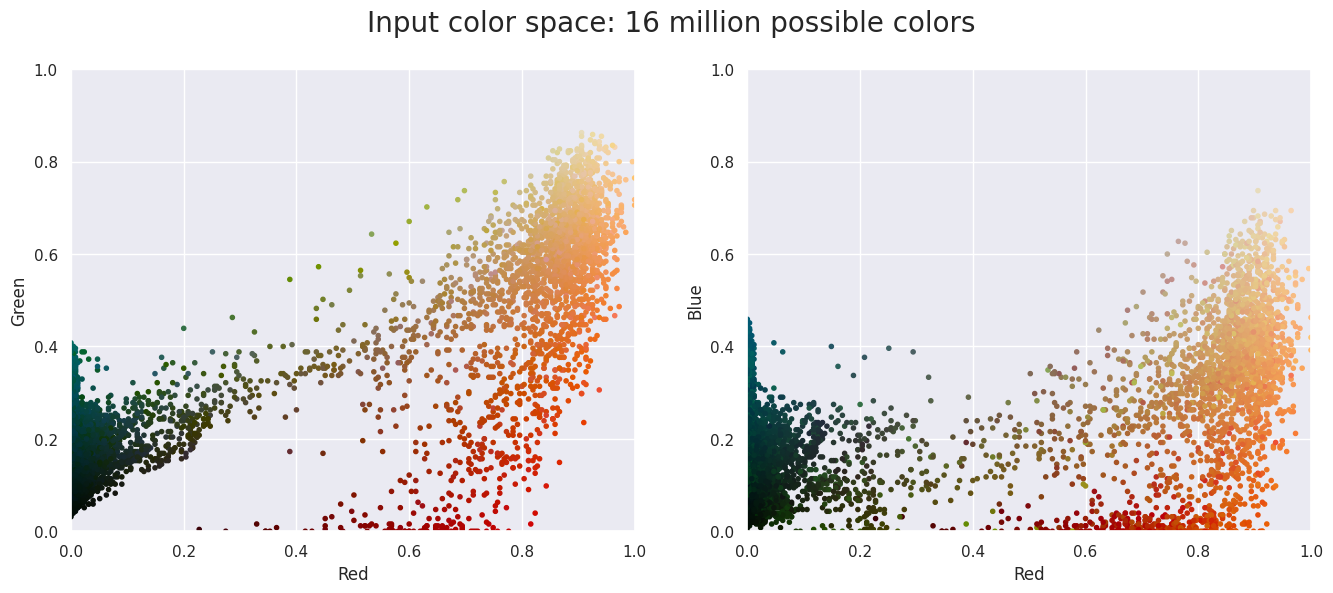

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Penjelasan :**
1.

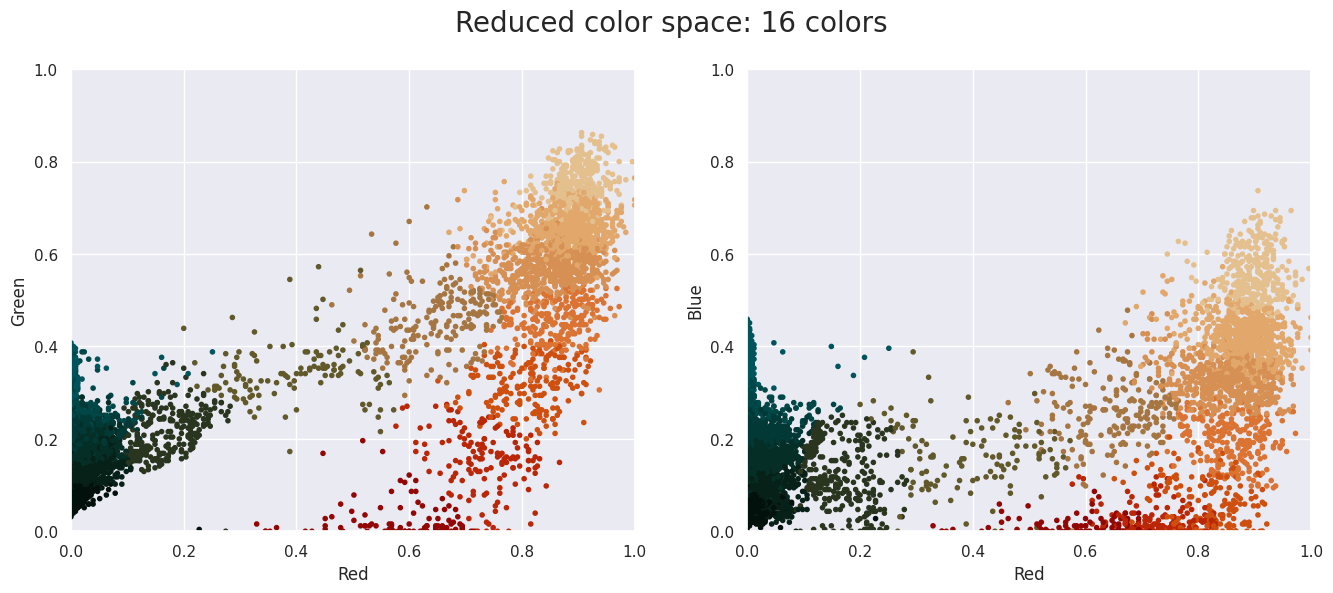

In [32]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

**Penjelasan :**
1.

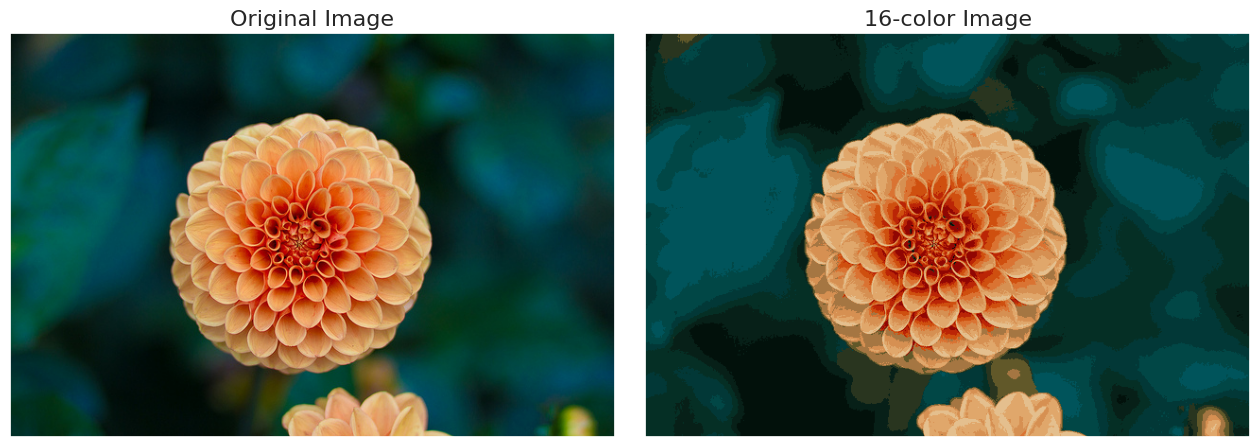

In [33]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

**Penjelasan :**
1.

# **Praktikum 3**
Self-optimizing Map (SOM)

Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

**Instalasi SOM**

In [34]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=44b2ddd6d9eb19da7eabb8d34f2e567ac128316894f9a0de2ab25e3e84c04177
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


**Penjelasan :**
1. pip install minisom:
  *   pip: pip adalah package installer untuk Python. Ini adalah alat yang digunakan untuk mengelola package atau library Python.
  *   install: Ini adalah subcommand dari pip yang menginstruksikan pip untuk menginstal package.
  *   minisom: Ini adalah nama package yang ingin Anda instal. Dalam kasus ini, itu adalah package MiniSom, yang merupakan implementasi minimal dari Self-Organizing Maps (SOM) di Python.

In [35]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**Penjelasan :**
1. from minisom import MiniSom: Mengimpor kelas MiniSom dari modul minisom. Kelas ini digunakan untuk membuat dan melatih Self-Organizing Maps (SOM).
2. import numpy as np: Mengimpor library numpy dan memberikan alias np. Library ini digunakan untuk komputasi numerik, terutama untuk operasi array multidimensi.
3. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt. Modul ini digunakan untuk membuat visualisasi data, seperti plot dan grafik.
4. from sklearn import datasets: Mengimpor modul datasets dari library sklearn. Modul ini menyediakan berbagai dataset standar untuk digunakan dalam pembelajaran mesin.

**Gunakan dataset Iris sebagai contoh**

In [36]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

**Penjelasan :**
1. iris = datasets.load_iris(): Memuat dataset Iris dari modul datasets dalam library sklearn. Dataset Iris adalah dataset standar yang sering digunakan dalam pembelajaran mesin untuk tugas klasifikasi. Data yang dimuat disimpan dalam variabel iris.
2. data = iris.data: Mengambil data dari objek iris dan menyimpannya dalam variabel data. Data dalam dataset Iris terdiri dari empat fitur: sepal length, sepal width, petal length, dan petal width. Variabel data akan berisi array NumPy yang menyimpan nilai-nilai fitur untuk setiap sampel dalam dataset.

**Normalisasi dataset agar nilainya berada dalam rentang yang seragam.**

In [37]:
# Normalisasi data
data = data / data.max(axis=0)

**Penjelasan :**
1. data = data / data.max(axis=0): Melakukan normalisasi data dengan membagi setiap nilai fitur dengan nilai maksimum dari fitur tersebut.
  *   data.max(axis=0): Mencari nilai maksimum untuk setiap kolom (fitur) dalam array data. axis=0 menunjukkan bahwa operasi maksimum dilakukan sepanjang kolom.
  *   data / data.max(axis=0): Membagi setiap elemen dalam array data dengan nilai maksimum yang sesuai untuk fitur tersebut.

**Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM**

In [38]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

**Penjelasan :**
1. map_size = (10, 10): Menentukan ukuran peta SOM sebagai tuple (10, 10). Ini berarti peta SOM akan memiliki 10x10 = 100 neuron.
2. som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5): Membuat objek MiniSom untuk menginisialisasi SOM.
  *   map_size[0], map_size[1]: Dimensi peta SOM (10, 10).
  *   data.shape[1]: Jumlah fitur dalam data, yang menentukan dimensi vektor bobot untuk setiap neuron.
  *   sigma=0.5: Radius awal lingkungan sekitar neuron pemenang.
  *   learning_rate=0.5: Laju pembelajaran awal.

**Inisialisasi bobot SOM secara acak.**

In [39]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

**Penjelasan :**
1. som.random_weights_init(data): Memanggil metode random_weights_init() dari objek som untuk menginisialisasi bobot neuron SOM secara acak. Metode ini menerima data sebagai input dan menginisialisasi bobot neuron dengan nilai acak yang diambil dari rentang nilai fitur dalam data.

**Melatih SOM dengan data menggunakan metode train_random.**

In [40]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

**Penjelasan :**
1. num_epochs = 100: Menentukan jumlah epoch untuk pelatihan SOM. Epoch adalah satu iterasi penuh melalui semua data pelatihan.
2. som.train_random(data, num_epochs): Memanggil metode train_random() dari objek som untuk melatih SOM. Metode ini menerima data dan jumlah epoch sebagai input.
  *   train_random melatih SOM menggunakan presentasi data secara acak. Pada setiap epoch, data point dipilih secara acak dari dataset dan disajikan ke SOM.
  *   Neuron pemenang (neuron dengan bobot paling mirip dengan data point) dan neuron-neuron di sekitarnya diperbarui bobotnya agar lebih mirip dengan data point tersebut.
  *   Proses ini diulang untuk jumlah epoch yang ditentukan, sehingga SOM secara bertahap mempelajari pola-pola dalam data.

**Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.**

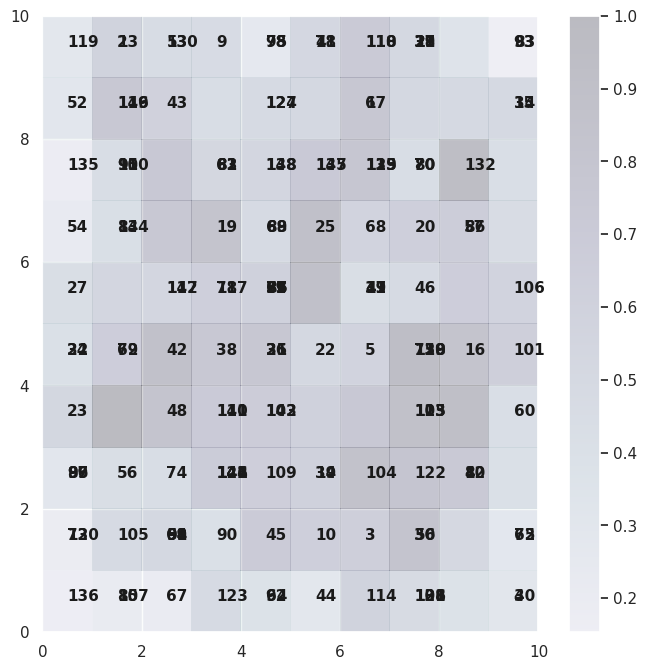

In [41]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

**Penjelasan :**
1. plt.figure(figsize=(8, 8)): Membuat figure baru dengan ukuran 8x8 inci untuk menampilkan plot.
2. for i, x in enumerate(data):: Melakukan loop melalui setiap data point x dalam dataset data menggunakan enumerate untuk mendapatkan indeks i dari setiap data point.
3. w = som.winner(x): Menemukan neuron pemenang (Best Matching Unit/BMU) untuk data point x menggunakan metode winner() dari objek som. Neuron pemenang adalah neuron pada peta SOM yang memiliki bobot paling mirip dengan data point x. Koordinat neuron pemenang disimpan dalam variabel w.
4. plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11}): Menampilkan teks pada plot di posisi neuron pemenang.
  *   w[0]+.5, w[1]+.5: Koordinat x dan y dari neuron pemenang, digeser sedikit agar teks berada di tengah neuron.
  *   str(i+1): Teks yang ditampilkan adalah indeks data point (ditambah 1 agar dimulai dari 1).
  *   color='k': Warna teks hitam.
  *   fontdict={'weight': 'bold', 'size': 11}: Mengatur font teks menjadi tebal dengan ukuran 11.
5. plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2): Menampilkan peta jarak SOM menggunakan pcolor().
  *   som.distance_map(): Menghasilkan peta jarak SOM, yang menunjukkan jarak antar neuron pada peta.
  *   .T: Transpose peta jarak agar sesuai dengan orientasi plot.
  *   cmap='bone_r': Menggunakan colormap 'bone_r' untuk mewarnai peta jarak.
  *   alpha=.2: Mengatur transparansi peta jarak menjadi 0.2.
6. plt.colorbar(): Menampilkan colorbar untuk peta jarak, yang menunjukkan skala warna dan nilai jarak.
7. plt.show(): Menampilkan plot.

# **Praktikum 4**
Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

**Instalasi minisom**

In [42]:
pip install minisom

**Penjelasan :**
1. pip install minisom:
  *   pip: pip adalah package installer untuk Python. Ini adalah alat yang digunakan untuk mengelola package atau library Python.
  *   install: Ini adalah subcommand dari pip yang menginstruksikan pip untuk menginstal package.
  *   minisom: Ini adalah nama package yang ingin Anda instal. Dalam kasus ini, itu adalah package MiniSom, yang merupakan implementasi minimal dari Self-Organizing Maps (SOM) di Python.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

**Penjelasan :**
1. import numpy as np: Mengimpor library numpy dan memberikan alias np. Library ini digunakan untuk komputasi numerik, terutama untuk operasi array multidimensi.
2. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt. Modul ini digunakan untuk membuat visualisasi data, seperti plot dan grafik.
3. from skimage import io: Mengimpor modul io dari library skimage. Modul ini menyediakan fungsi untuk membaca dan menulis gambar.

In [44]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

**Penjelasan :**
1. def initialize_weights(input_shape, output_shape):: Mendefinisikan fungsi bernama initialize_weights yang menerima dua argumen:
  *   input_shape: Tuple yang menunjukkan bentuk (shape) dari data input.
  *   output_shape: Tuple yang menunjukkan bentuk (shape) dari peta SOM (output).
3. return np.random.rand(output_shape[0], output_shape[1], input_shape[2]): Mengembalikan array NumPy yang berisi bobot SOM yang telah diinisialisasi secara acak.
  *   np.random.rand(): Fungsi dari library numpy yang menghasilkan angka acak antara 0 dan 1.
  *   output_shape[0], output_shape[1]: Dimensi peta SOM (misalnya, 10x10).
  *   input_shape[2]: Jumlah fitur dalam data input, yang menentukan dimensi vektor bobot untuk setiap neuron.

In [45]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

**Penjelasan :**
1. def calculate_distance(input_vector, weights):: Mendefinisikan fungsi bernama calculate_distance yang menerima dua argumen:
  *   input_vector: Vektor input yang merepresentasikan data point.
  *   weights: Bobot dari neuron-neuron dalam SOM.
3. return np.linalg.norm(input_vector - weights, axis=2): Mengembalikan jarak antara vektor input dan bobot SOM.
  *   np.linalg.norm(): Fungsi dari library numpy yang menghitung norma (magnitude) dari vektor.
  *   input_vector - weights: Mengurangi bobot SOM dari vektor input untuk mendapatkan vektor selisih.
  *   axis=2: Menentukan sumbu di mana norma dihitung. Dalam kasus ini, axis=2 menunjukkan bahwa norma dihitung sepanjang dimensi terakhir dari array (yang merepresentasikan fitur-fitur dari vektor input dan bobot SOM).

In [46]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

**Penjelasan :**
1. def find_winner_unit_in_image(input_vector, weights):: Mendefinisikan fungsi bernama find_winner_unit_in_image yang menerima dua argumen:
  *   input_vector: Vektor input yang merepresentasikan data point.
  *   weights: Bobot dari neuron-neuron dalam SOM.
2. distances = calculate_distance(input_vector, weights): Memanggil fungsi calculate_distance untuk menghitung jarak antara vektor input dan bobot SOM, dan menyimpan hasilnya dalam variabel distances.
3. return np.unravel_index(np.argmin(distances), distances.shape): Mengembalikan indeks unit pemenang dalam SOM.
  *   np.argmin(distances): Mencari indeks elemen minimum dalam array distances, yang merepresentasikan jarak terkecil antara vektor input dan bobot SOM.
  *   np.unravel_index(): Mengubah indeks elemen minimum menjadi indeks multidimensi (baris dan kolom) dalam peta SOM.
  *   distances.shape: Bentuk (shape) dari array distances, yang digunakan untuk mengonversi indeks elemen minimum menjadi indeks multidimensi.

In [47]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

**Penjelasan :**
1. def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):: Mendefinisikan fungsi bernama update_weights yang menerima lima argumen:
  *   input_vector: Vektor input yang merepresentasikan data point.
  *   weights: Bobot dari neuron-neuron dalam SOM.
  *   winner: Indeks unit pemenang (BMU) dalam SOM.
  *   learning_rate: Laju pembelajaran, yang mengontrol seberapa besar bobot diperbarui.
  *   neighborhood_radius: Radius lingkungan sekitar unit pemenang, yang menentukan neuron-neuron mana yang akan diperbarui bobotnya.
2. distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2): Menghitung jarak antara setiap neuron dalam SOM dan unit pemenang.
  *   np.indices(weights.shape[:2]): Membuat array yang berisi indeks baris dan kolom dari setiap neuron dalam SOM.
  *   .T: Transpose array indeks.
  *   np.array(winner).reshape(1, -1): Mengubah bentuk indeks unit pemenang menjadi array 2D dengan satu baris.
  *   np.linalg.norm(): Menghitung jarak Euclidean antara setiap neuron dan unit pemenang.
  *   axis=2: Menentukan sumbu di mana norma dihitung.
3. influence = np.exp(-distances / (2 * neighborhood_radius**2)): Menghitung pengaruh unit pemenang pada setiap neuron dalam SOM.
  *   np.exp(): Fungsi eksponensial.
  *   -distances / (2 * neighborhood_radius**2): Membagi jarak dengan kuadrat radius lingkungan dan mengalikannya dengan -1.
4. weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights): Memperbarui bobot SOM.
  *   learning_rate * influence[:, :, np.newaxis]: Mengalikan laju pembelajaran dengan pengaruh unit pemenang untuk setiap neuron.
  *   (input_vector - weights): Mengurangi bobot SOM dari vektor input untuk mendapatkan vektor selisih.
  *   weights += ...: Menambahkan hasil perkalian dan selisih ke bobot SOM untuk memperbaruinya.

In [48]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

**Penjelasan :**
1. def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):: Mendefinisikan fungsi bernama train_som yang menerima empat argumen:
  *   image: Gambar input yang akan digunakan untuk melatih SOM.
  *   num_epochs: Jumlah epoch untuk pelatihan SOM.
  *   initial_learning_rate: Laju pembelajaran awal.
  *   initial_neighborhood_radius: Radius lingkungan awal.
2. input_shape = image.shape: Mendapatkan bentuk (shape) dari gambar input dan menyimpannya dalam variabel input_shape.
3. som_shape = (10, 10, input_shape[2]): Menentukan bentuk (shape) dari peta SOM, yang dalam hal ini adalah 10x10 dengan jumlah fitur yang sama dengan gambar input.
4. weights = initialize_weights(input_shape, som_shape): Memanggil fungsi initialize_weights untuk menginisialisasi bobot SOM secara acak.
5. for epoch in range(num_epochs):: Melakukan loop melalui setiap epoch pelatihan.
6. learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs): Memperbarui laju pembelajaran menggunakan fungsi eksponensial yang menurun seiring dengan bertambahnya epoch.
7. neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs): Memperbarui radius lingkungan menggunakan fungsi eksponensial yang menurun seiring dengan bertambahnya epoch.
8. for i in range(input_shape[0]):: Melakukan loop melalui setiap baris piksel dalam gambar input.
9. for j in range(input_shape[1]):: Melakukan loop melalui setiap kolom piksel dalam gambar input.
10. input_vector = image[i, j, :]: Mendapatkan vektor input yang merepresentasikan piksel saat ini dalam gambar.
11. winner = find_winner_unit_in_image(input_vector, weights): Memanggil fungsi find_winner_unit_in_image untuk menemukan unit pemenang (BMU) untuk vektor input saat ini.
12. update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius): Memanggil fungsi update_weights untuk memperbarui bobot SOM berdasarkan unit pemenang, laju pembelajaran, dan radius lingkungan.
13. return weights: Mengembalikan bobot SOM yang telah diperbarui setelah proses pelatihan selesai.

In [49]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = dir + "Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

**Penjelasan :**
1. Lenna_path = dir + "Lenna.png": Menentukan path ke citra Lenna dengan menggabungkan variabel dir (yang seharusnya berisi path direktori) dengan nama file "Lenna.png".
2. Lenna = io.imread(Lenna_path) / 255.0: Membaca citra Lenna menggunakan fungsi io.imread() dari library skimage dan menormalisasi intensitas piksel.
  *   io.imread(Lenna_path): Membaca citra dari path yang ditentukan dan mengembalikan array NumPy yang merepresentasikan citra.
  *   / 255.0: Membagi setiap nilai piksel dengan 255.0 untuk menormalisasi intensitas piksel ke rentang [0, 1]. Hal ini dilakukan karena banyak algoritma pemrosesan citra bekerja lebih baik dengan data yang dinormalisasi.

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

**Penjelasan :**
1. num_epochs = 100: Menentukan jumlah epoch untuk pelatihan SOM. Epoch adalah satu iterasi penuh melalui semua data pelatihan.
2. initial_learning_rate = 0.1: Menentukan laju pembelajaran awal untuk SOM. Laju pembelajaran mengontrol seberapa besar bobot SOM diperbarui pada setiap iterasi.
3. initial_neighborhood_radius = 5: Menentukan radius lingkungan awal untuk SOM. Radius lingkungan menentukan seberapa banyak neuron di sekitar neuron pemenang (BMU) yang diperbarui bobotnya pada setiap iterasi.
4. trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius): Memanggil fungsi train_som untuk melatih SOM menggunakan citra Lenna dan parameter yang telah ditentukan.
  *   Lenna: Citra input yang telah dimuat dan dinormalisasi.
  *   num_epochs, initial_learning_rate, initial_neighborhood_radius: Parameter untuk pelatihan SOM.
  *   Fungsi train_som akan mengembalikan bobot SOM yang telah diperbarui setelah pelatihan selesai, dan bobot ini disimpan dalam variabel trained_weights.

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

**Penjelasan :**
1. plt.imshow(trained_weights): Menampilkan bobot SOM yang telah dilatih menggunakan fungsi imshow() dari library matplotlib.
  *   trained_weights: Variabel yang berisi bobot SOM yang telah diperbarui setelah pelatihan selesai. Bobot ini direpresentasikan sebagai array NumPy multidimensi.
  *   Fungsi imshow() akan menampilkan array NumPy sebagai gambar.
2. plt.title('Trained SOM Weights for Lena'): Memberikan judul pada plot yang ditampilkan. Judulnya adalah "Trained SOM Weights for Lena".
3. plt.show(): Menampilkan plot yang telah dibuat.

# **Tugas**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = pd.read_csv(dir + 'Mall_Customers.csv')

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [52]:
# Seleksi fitur
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

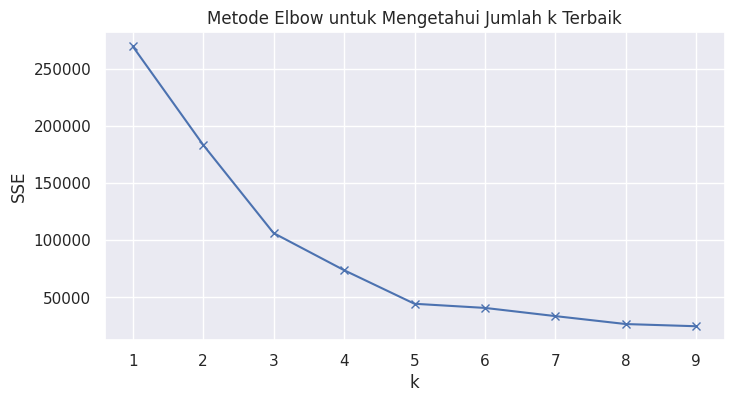

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436


In [53]:
# Optimalisasi jumlah klaster menggunakan metode elbow dan model KMeans

sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(X)
 sse.append(kmeans.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

Dari sini dapat diketahui nilai k terbaik adalah 3 atas dasar lekukan / elbow yang terlihat pada angka 3

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

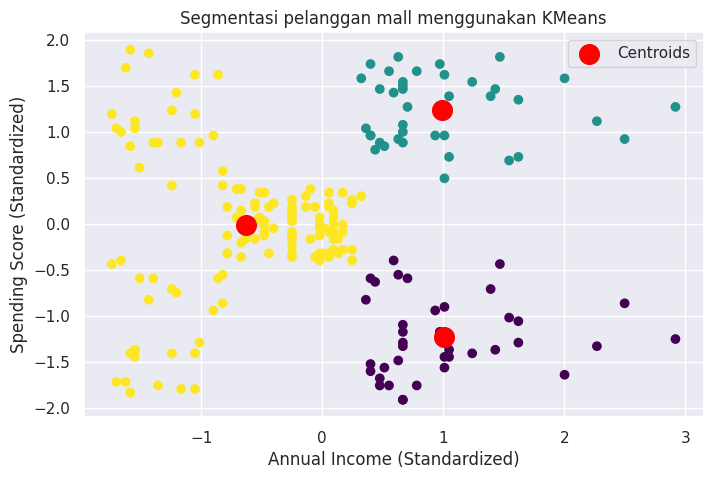

In [54]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Segmentasi pelanggan mall menggunakan KMeans')
plt.legend()
plt.show()